env: GOOGLE_APPLICATION_CREDENTIALS=C:\Users\shane\analytics\ethereum\service_key.json


C:\Users\shane\AppData\Local\Temp\ipykernel_11048\416568100.py:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['time_diff'] = df['time_diff'].astype(int)


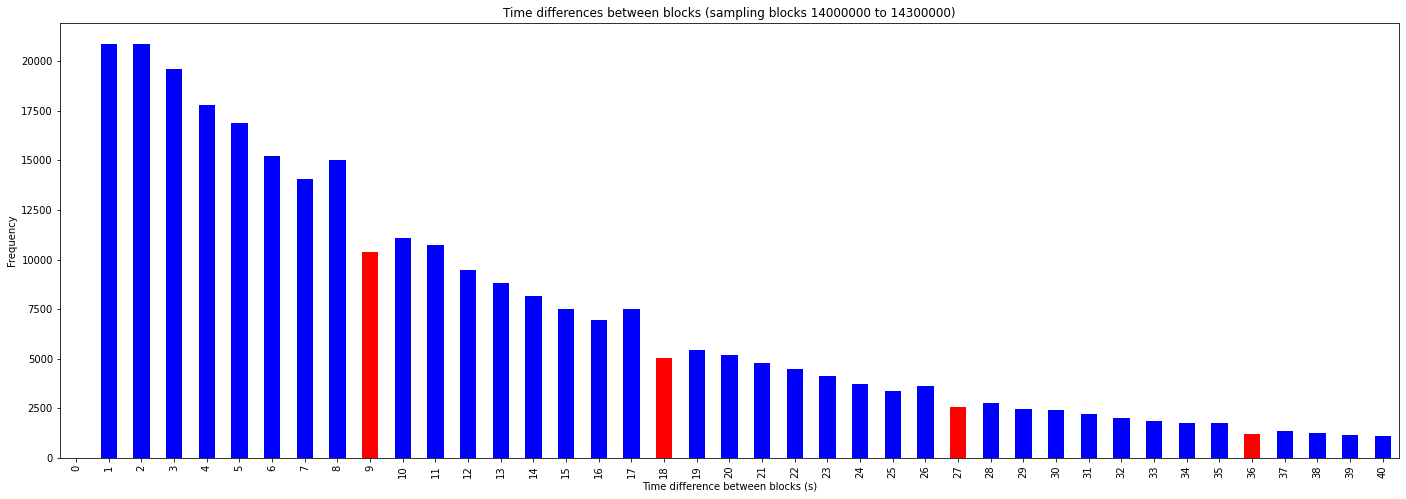

In [3]:
%env GOOGLE_APPLICATION_CREDENTIALS = C:\Users\shane\analytics\ethereum\service_key.json
from google.cloud import bigquery
client = bigquery.Client()
import matplotlib.pyplot as plt
import pandas as pd

sql = """
SELECT 
  number,
  timestamp,
  difficulty
FROM
  `bigquery-public-data.crypto_ethereum.blocks` AS blocks
WHERE number >= 14000000
AND number < 14300001
ORDER by number desc
"""
df_raw = client.query(sql).to_dataframe()
time_diff_raw = df_raw['timestamp'] - df_raw['timestamp'].shift(-1)
df_raw['time_diff'] = time_diff_raw.dt.seconds
df = df_raw.head(300000) # removes the last entry because it doesn't have a diff
df['time_diff'] = df['time_diff'].astype(int)

values = range(41)
counts = []
color = []
for val in values:
    if val in df['time_diff'].values:
        counts.append(df['time_diff'].value_counts()[val])
    else:
        counts.append(0)
    if val in [9,18,27,36]:
        color.append('red')
    else:
        color.append('blue')
    
plt.figure(figsize=(24, 8))
ax = pd.Series(counts).plot(kind="bar", color=color)
ax.set_title("Time differences between blocks (sampling blocks 14000000 to 14300000)")
ax.set_xlabel("Time difference between blocks (s)")
ax.set_ylabel("Frequency")
ax.set_xticklabels(values)
plt.savefig("figure.jpg") # save as jpg
plt.show()